C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - accuracy: 0.6478 - loss: 0.6400 - val_accuracy: 0.6748 - val_loss: 0.5508
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7665 - loss: 0.4851 - val_accuracy: 0.7154 - val_loss: 0.4890
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7959 - loss: 0.4591 - val_accuracy: 0.7317 - val_loss: 0.4875
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7794 - loss: 0.4337 - val_accuracy: 0.7724 - val_loss: 0.5223
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7680 - loss: 0.4280 - val_accuracy: 0.6992 - val_loss: 0.4979
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8294 - loss: 0.4072 - val_accuracy: 0.7805 - val_loss: 0.4927
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8353 - loss: 0.3501 - val_accuracy: 0.7398 - val_loss: 0.5014
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8462 - loss: 0.3531 - val_accuracy: 0.7398 - val_loss

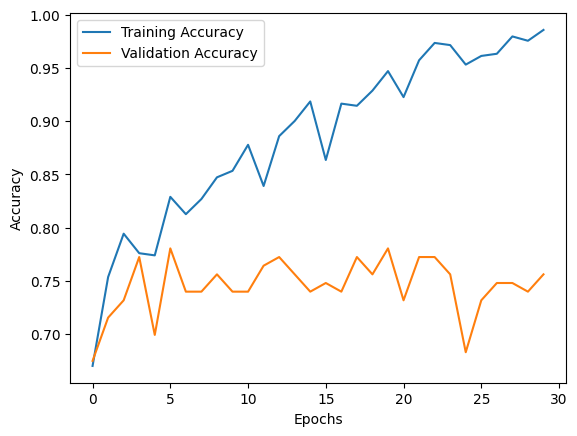

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("diabetes.csv")
data.head()


X = data.drop(columns="Outcome")  # Features
y = data["Outcome"]  # Target


xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

model = Sequential()


model.add(layers.Dense(64, activation='relu', input_shape=(xtrain.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(xtrain, ytrain, epochs=30, batch_size=32, validation_split=0.2)


print(f"The loss of the model is: {loss} and the accuracy is: {accuracy}")


import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [ ]:
import mlflow
import mlflow.keras
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


data = pd.read_csv('diabetes.csv')


X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values


xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


mlflow.set_tracking_uri("http://localhost:5000")

try:
    
    if mlflow.active_run():
        mlflow.end_run()

    
    with mlflow.start_run() as run:
        
        mlflow.log_param("optimizer", "adam")
        mlflow.log_param("loss_function", "binary_crossentropy")
        mlflow.log_param("epochs", 20)
        mlflow.log_param("batch_size", 32)

        history = model.fit(xtrain, ytrain, epochs=20, batch_size=32, validation_split=0.2)

     
        mlflow.log_metric("train_accuracy", history.history['accuracy'][-1])
        mlflow.log_metric("val_accuracy", history.history['val_accuracy'][-1])

       
        test_loss, test_accuracy = model.evaluate(xtest, ytest)
        mlflow.log_metric("test_loss", test_loss)
        mlflow.log_metric("test_accuracy", test_accuracy)

        
        mlflow.keras.log_model(model, "model")

except Exception as e:
    print(f"An error occurred: {e}")

finally:

    if mlflow.active_run():
        mlflow.end_run()

tf.saved_model.save(model, 'exported_model/1')